# Chapter 8: Image Segmentation

### Felzenszwalb's efficient graph-based image segmentation


In [4]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

Thực hiện phân đoạn ảnh (image segmentation) sử dụng phương pháp Felzenszwalb để chia ảnh thành các vùng (segments) và trực quan hóa các vùng đó. Đây là một kỹ thuật phân đoạn ảnh phổ biến để nhận diện và phân biệt các đối tượng trong ảnh. Dưới đây là giải thích chi tiết về từng phần trong đoạn mã:


        
*   **segments\_fz = felzenszwalb(img, scale=100, sigma=0.5, min\_size=100)**
    
    *   Áp dụng phương pháp **Felzenszwalb** cho phân đoạn ảnh. Phương pháp này chia ảnh thành các vùng theo cách tự động dựa trên độ tương đồng màu sắc và độ tương phản:
        
        *   scale=100: Điều chỉnh độ lớn của các vùng phân đoạn. Giá trị lớn hơn sẽ tạo ra các vùng lớn hơn.
            
        *   sigma=0.5: Độ mượt của ảnh (smoothing). Giá trị này giúp điều chỉnh độ nhạy của thuật toán đối với các chi tiết nhỏ trong ảnh.
            
        *   min\_size=100: Kích thước tối thiểu của một vùng phân đoạn. Các vùng nhỏ hơn giá trị này sẽ bị gộp lại.
            
*   **borders = find\_boundaries(segments\_fz)**
    
    *   Xác định biên của các vùng phân đoạn. find\_boundaries trả về một mảng boolean, với giá trị True ở các vị trí là biên giữa các vùng phân đoạn.
        
*   **unique\_colors = np.unique(segments\_fz.ravel())**
    
    *   segments\_fz.ravel(): Chuyển đổi mảng 2D của các vùng phân đoạn thành một mảng 1D.
        
    *   np.unique(...): Tìm các giá trị duy nhất trong mảng, tương ứng với các mã phân đoạn khác nhau.
        
*   **segments\_fz\[borders\] = -1**
    
    *   Thay đổi giá trị các vùng biên (borders) thành -1. Điều này giúp hiển thị biên vùng phân đoạn rõ ràng khi trực quan hóa.
        
*   **colors = \[np.zeros(3)\]**
    
    *   Khởi tạo một danh sách colors với một màu đen (\[0, 0, 0\]), dùng làm nền cho các biên phân đoạn.
        
*   **colors.append(np.mean(img\[segments\_fz == color\], axis=0))**
    
    *   Lặp qua tất cả các giá trị phân đoạn duy nhất và tính toán màu sắc trung bình của mỗi vùng phân đoạn:
        
    
    *   Tạo một màu đại diện cho mỗi vùng phân đoạn bằng cách tính trung bình các giá trị màu của các pixel trong vùng đó.
        
*   **cm = LinearSegmentedColormap.from\_list('pallete', colors, N=len(colors))**
    
    *   Tạo một **LinearSegmentedColormap** mới từ danh sách các màu sắc đã tính toán ở bước trước. N=len(colors) xác định số lượng màu sắc trong bản đồ màu.

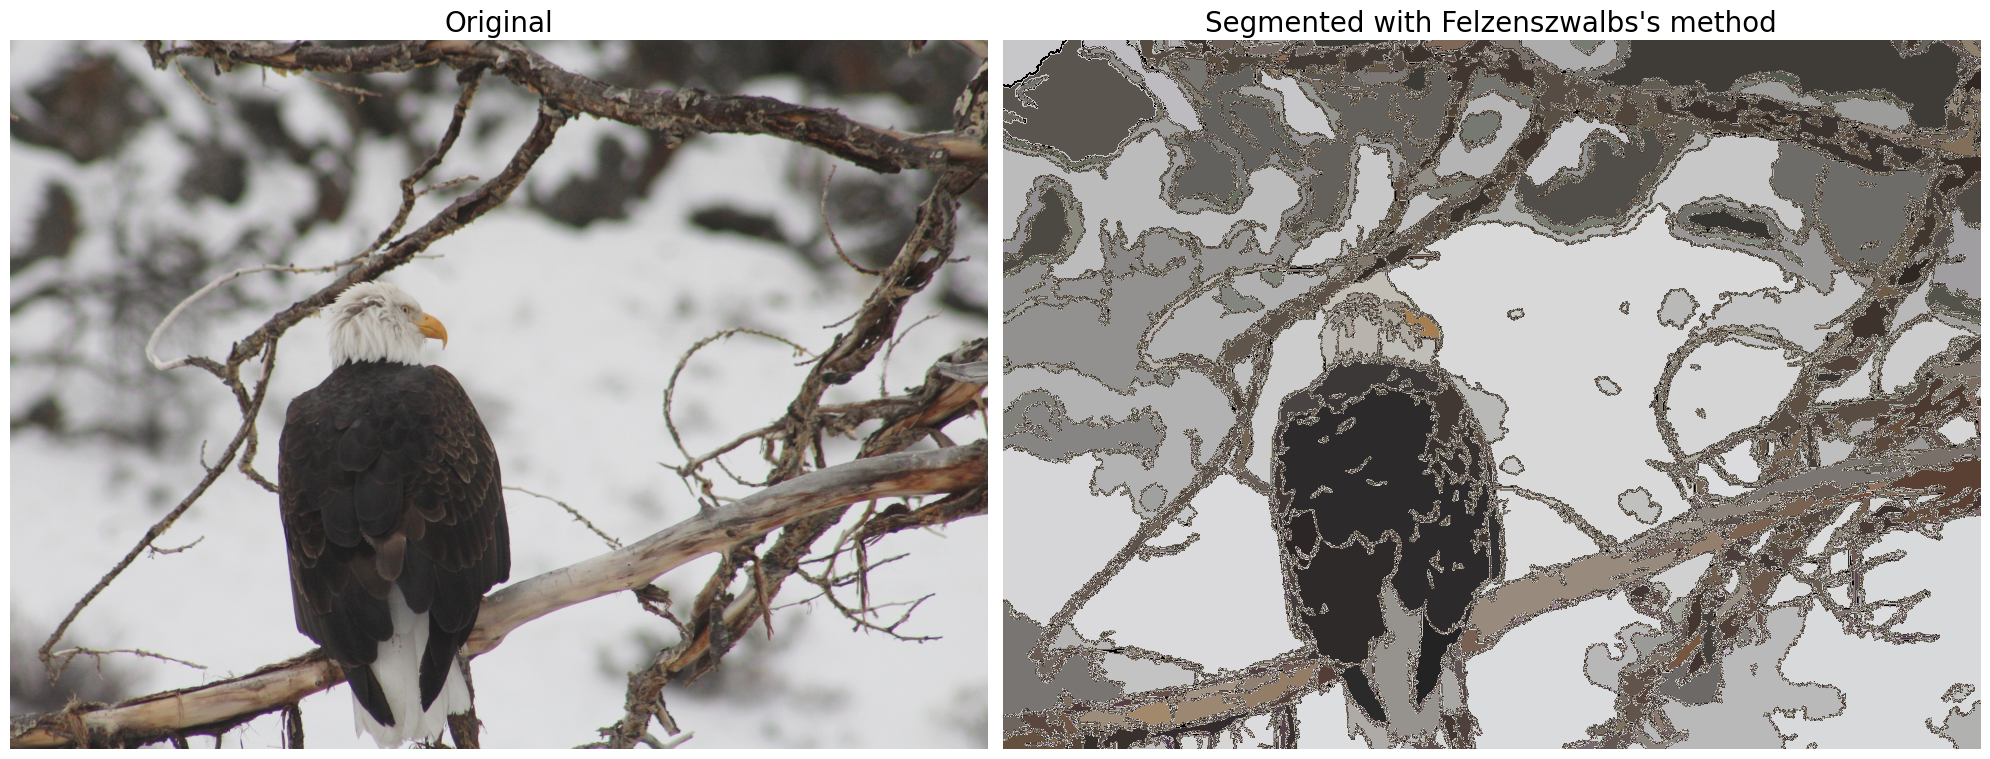

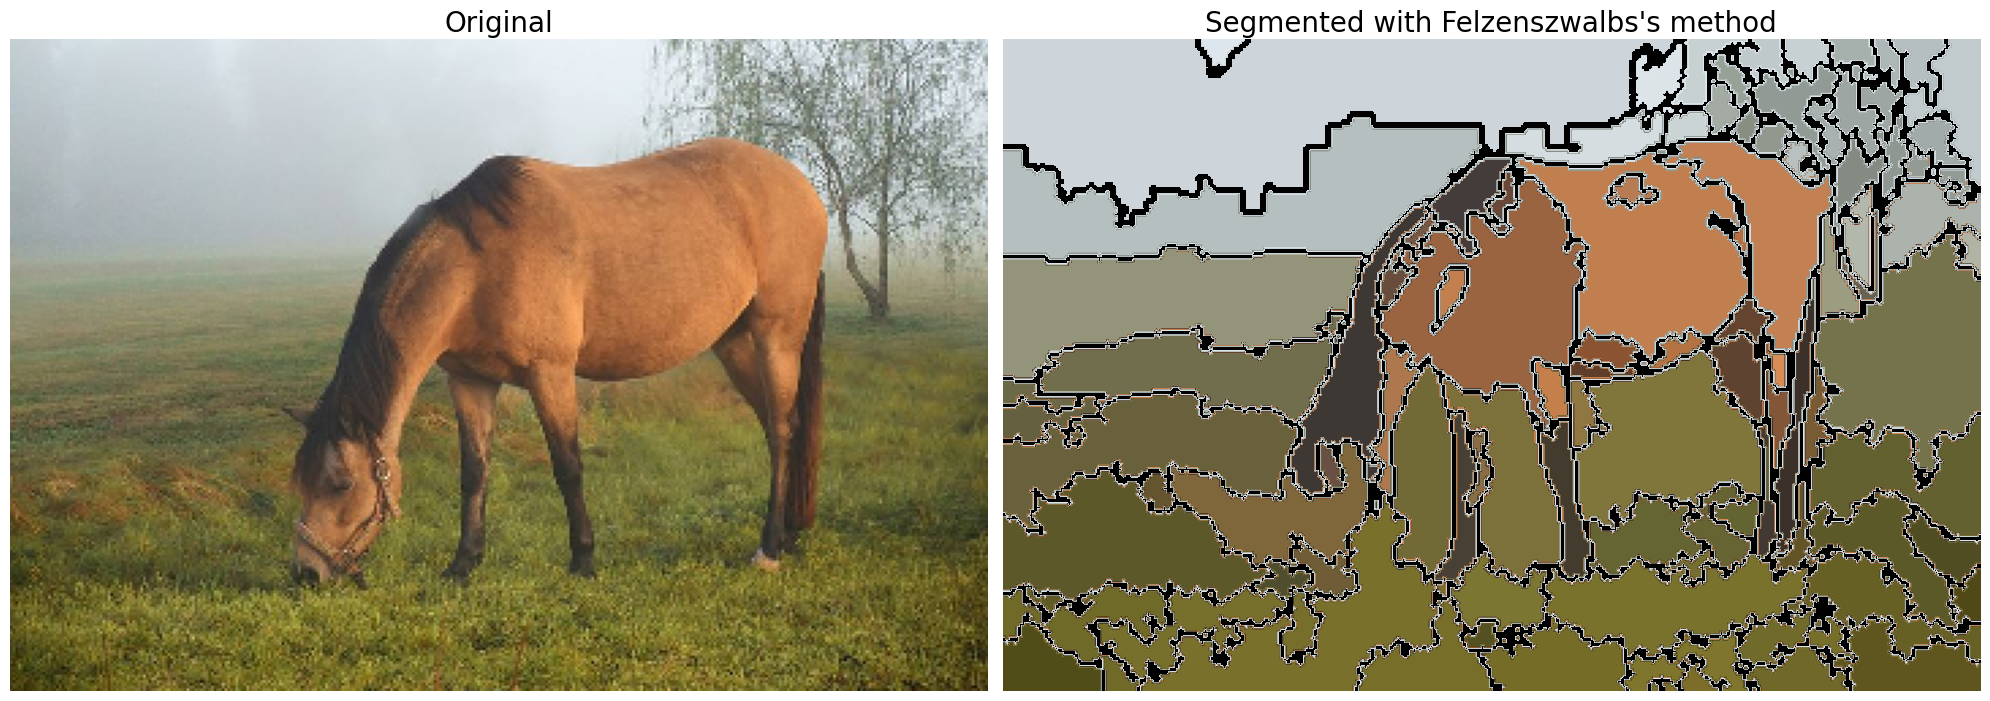

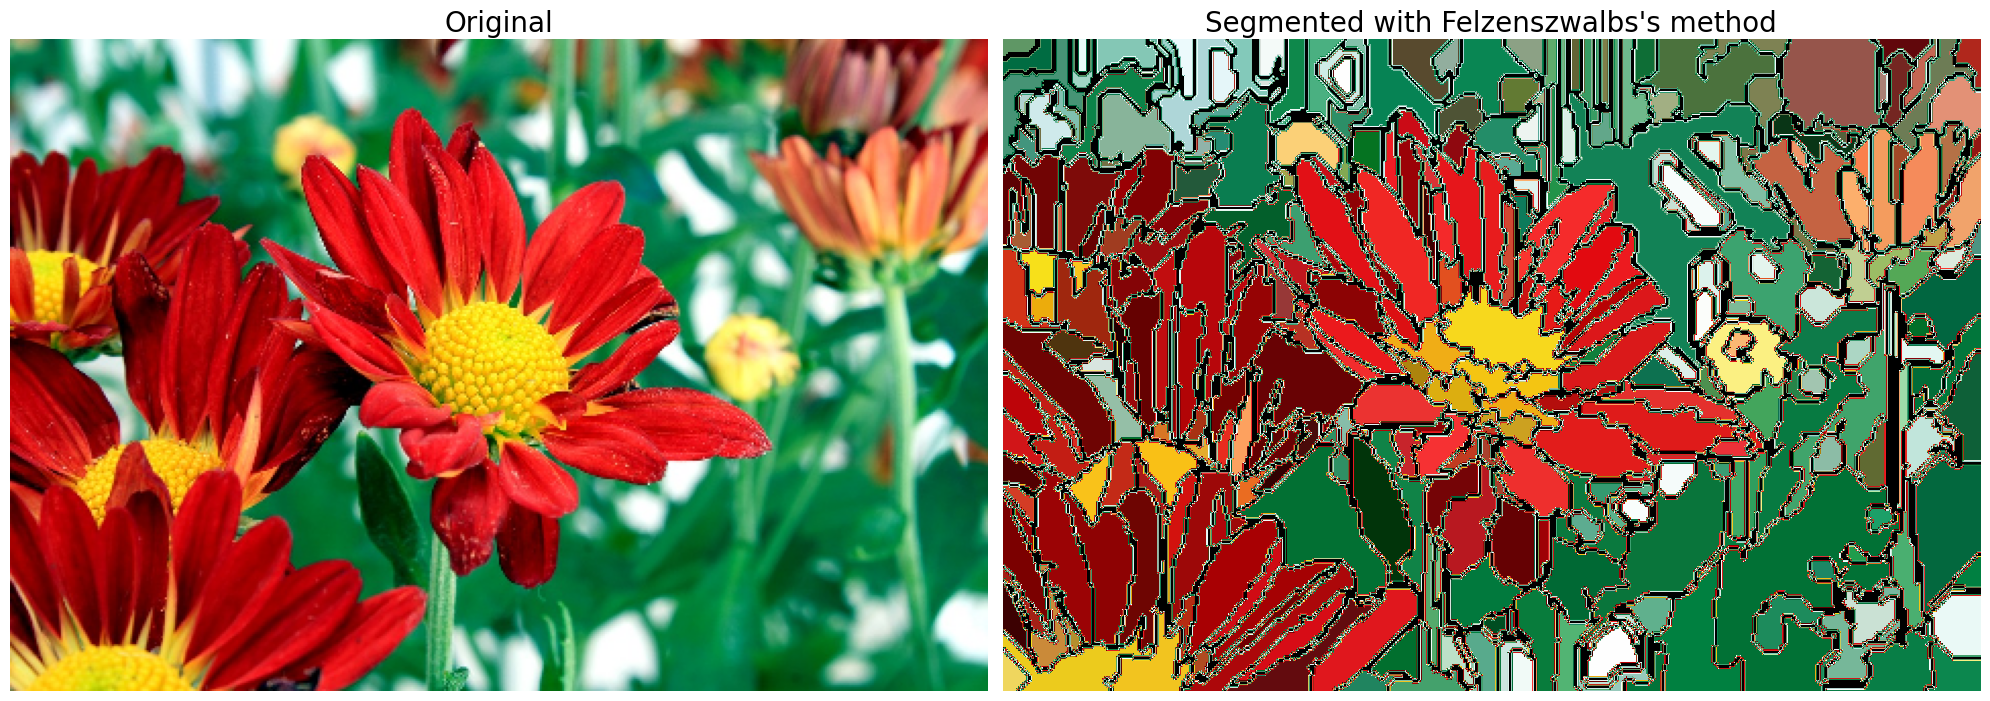

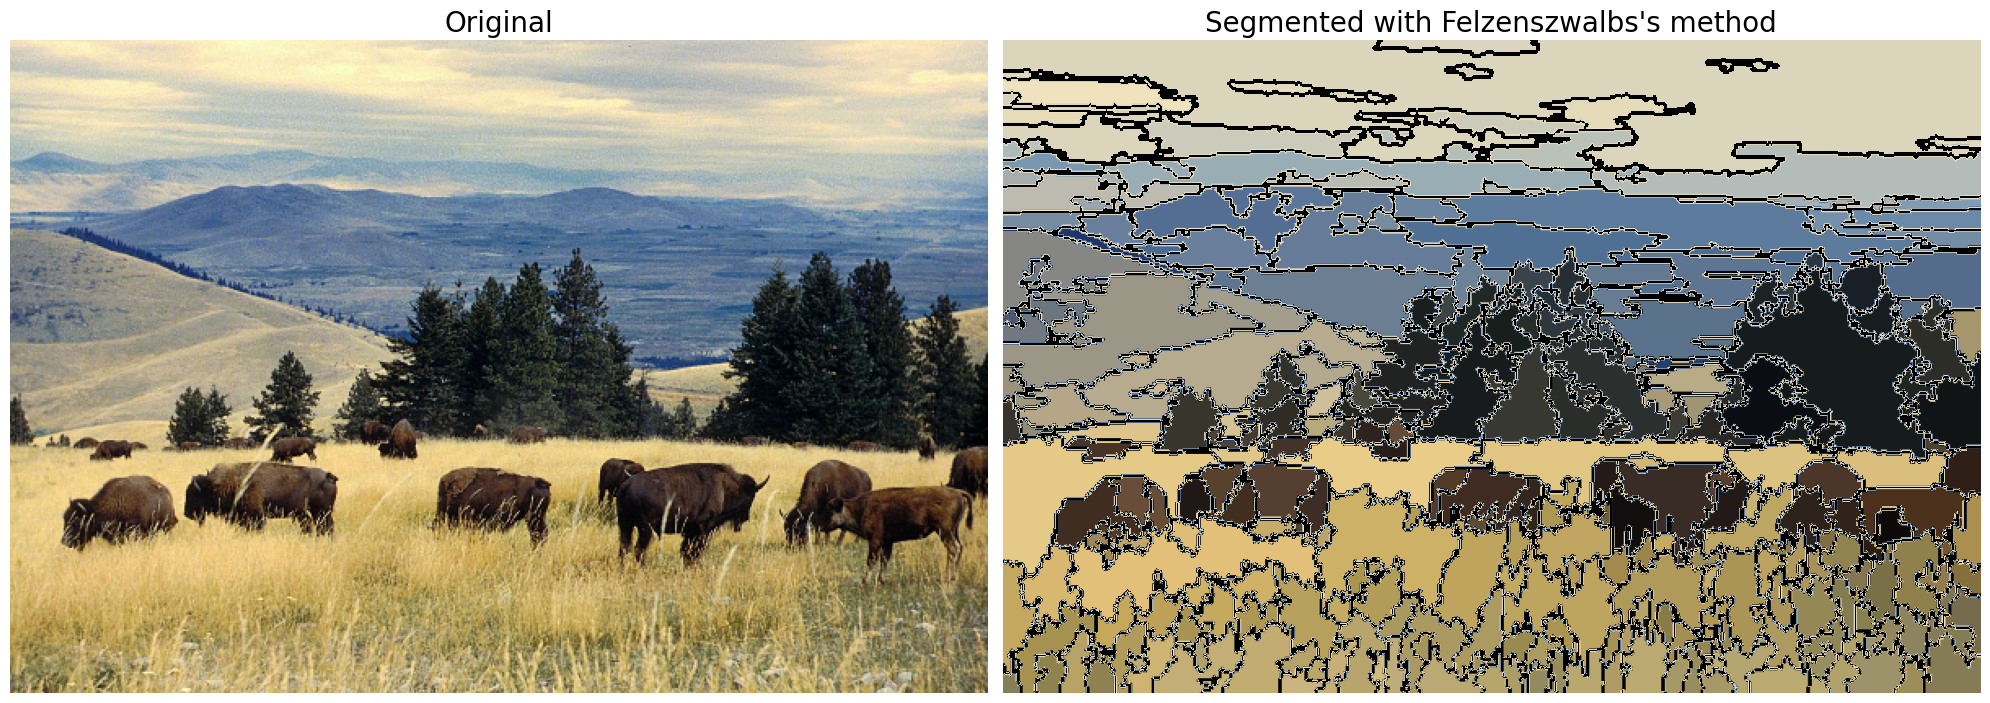

In [5]:
from matplotlib.colors import LinearSegmentedColormap
for imfile in ['../images/eagle.jpg', '../images/horses.jpg', '../images/flowers.jpg', '../images/bisons.jpg']:
    img = img_as_float(imread(imfile)[::2, ::2, :3])
    plt.figure(figsize=(20,10))
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=100) #300
    borders = find_boundaries(segments_fz)
    unique_colors = np.unique(segments_fz.ravel())
    segments_fz[borders] = -1 #len(unique_colors)
    colors = [np.zeros(3)]
    for color in unique_colors:
        colors.append(np.mean(img[segments_fz == color], axis=0))    
    cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original', size=20)
    plt.axis('off') 
    plt.subplot(122)
    plt.imshow(segments_fz, cmap=cm)
    plt.title('Segmented with Felzenszwalbs\'s method', size=20)
    plt.axis('off')   
    plt.tight_layout()
    plt.show()